In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import files
arquivo = files.upload()

Saving pendigits.tra to pendigits.tra
Saving pendigits.tes to pendigits.tes


In [3]:
train = pd.read_csv('pendigits.tra', header=None, sep=',')
test = pd.read_csv('pendigits.tes', header=None, sep=',')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
X = train.iloc[:, :-1].values
print(X) 
print(X.shape)

[[ 47 100  27 ...  90  40  98]
 [  0  89  27 ...   2 100   6]
 [  0  57  31 ...  25  16   0]
 ...
 [100  98  60 ...   0   0   5]
 [ 59  65  91 ...   1 100   0]
 [  0  78  29 ...  36 100  40]]
(7494, 16)


In [5]:
y= train.iloc[:,-1].values 
print(y)
print(y.shape)

[8 2 1 ... 5 1 7]
(7494,)


In [6]:
X_test = test.iloc[:,:-1].values 
print(X_test)
print(X_test.shape)

[[ 88  92   2 ...  65 100 100]
 [ 80 100  18 ...  61  56  98]
 [  0  94   9 ... 100  18  92]
 ...
 [ 56 100  27 ...  93  38  93]
 [ 19 100   0 ...  97  10  81]
 [ 38 100  37 ...  26  65   0]]
(3498, 16)


In [7]:
y_test= test.iloc[:,-1].values 
print(y_test)
print(y_test.shape)

[8 8 8 ... 0 0 4]
(3498,)


In [8]:
#Definição da função de GridSearch para encontrar os melhores parâmetros
@ignore_warnings(category=ConvergenceWarning)
def search(parameters, cv, score, X, y):
    best = GridSearchCV(MLPClassifier(), parameters, cv=cv, scoring=score, n_jobs=-1, return_train_score=False, verbose=1)
    best.fit(X,y)
    print("Best parameters set found on development set:")
    print(best.best_params_)
  

In [9]:
#Definição dos parâmetros iniciais do Grid Search
parameters = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [(10,10,10),(15,15,15),(30,30,30),(10,50,10),(5,5,10),
                                   (10,10,10,10,10),(35,35,35),(40,40,40),(50,50,50),
                                   (25,25,25),(20,20,20),(10,20,10),(46,26),(20,),(21,)],
            'learning_rate': ['constant','invscaling','adaptive']}]

cv = 5
score = 'accuracy'

In [10]:
search(parameters,cv,score,X,y)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [11]:
#{'activation': 'relu', 'hidden_layer_sizes': (22,), 'learning_rate': 'invscaling', 'solver': 'adam'}
#{'activation': 'relu', 'hidden_layer_sizes': (23,), 'learning_rate': 'adaptive', 'solver': 'adam'}
import sklearn.metrics as metric
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50), activation='relu', learning_rate='constant' ) # parâmetros da rede neural
mlp.fit(X, y)                        # treino
y_pred=mlp.predict(X_test)                        # predição
print(y_pred)                                      # apresenta a saída
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('acuracy=',accuracy)       

[8 8 8 ... 0 0 4]
acuracy= 0.9777015437392796


In [ ]:
#{'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
#MLP: {'lbfgs', 'sgd', 'adam'}
activation1 = ['identity', 'logistic', 'tanh', 'relu']
solver1 = ['lbfgs', 'sgd', 'adam']
for i in range(len(activation1)):
  for j in range(len(solver1)):
    print(solver1[j] + " + " + activation1[i])
    mlp = MLPClassifier(solver=solver1[j], hidden_layer_sizes=(2,1), activation=activation1[i]) # parâmetros da rede neural
    mlp.fit(X, y)                        # treino
    y_pred=mlp.predict(X_test)                        # predição
    print(y_pred)                                      # apresenta a saída
    accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
    print('acuracy=',accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y,y_pred)

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 127,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 129,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 126,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 121,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 132,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 120]])

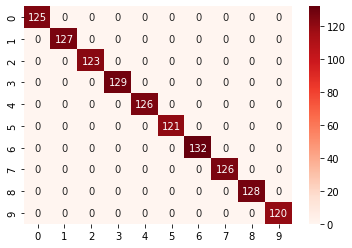

In [ ]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y,y_pred)
lbl1=["0","1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
lbl2=["0","1", "2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
sns.heatmap(cf,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
#Calcula a acurácia para o conjunto de teste
predictions = knn.predict(x_test)
accuracy_score(y_test,predictions)*100

98.51851851851852

In [ ]:
#Gera a matriz de confusão para o conjunto de teste
confusion_matrix(y_test,predictions)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 57]])

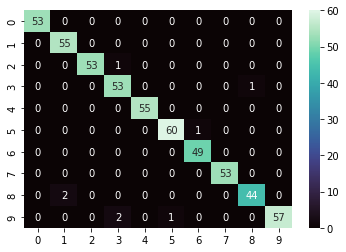

In [ ]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="mako", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions,average='macro')*100

98.51330915054677

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        55
           2       1.00      0.98      0.99        54
           3       0.95      0.98      0.96        54
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        61
           6       0.98      1.00      0.99        49
           7       1.00      1.00      1.00        53
           8       0.98      0.96      0.97        46
           9       1.00      0.95      0.97        60

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

